<a href="https://colab.research.google.com/github/arigarans24-beep/Spam/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

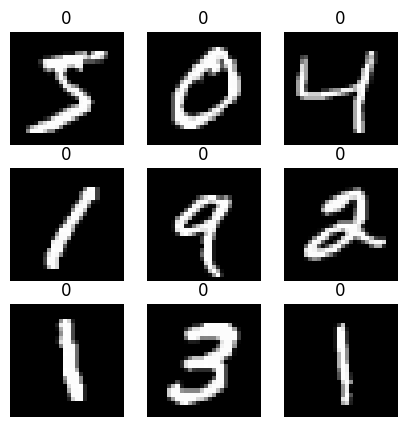

In [ ]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(np.argmax(y_train[i]))
    plt.axis('off')
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, kernel_size=(3,3), activation='relu'),
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 52s 119ms/step - accuracy: 0.7956 - loss: 0.6497 - val_accuracy: 0.9823 - val_loss: 0.0580
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 113ms/step - accuracy: 0.9749 - loss: 0.0876 - val_accuracy: 0.9888 - val_loss: 0.0376
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 110ms/step - accuracy: 0.9835 - loss: 0.0556 - val_accuracy: 0.9875 - val_loss: 0.0407
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 113ms/step - accuracy: 0.9875 - loss: 0.0437 - val_accuracy: 0.9908 - val_loss: 0.0331
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 110ms/step - accuracy: 0.9893 - loss: 0.0369 - val_accuracy: 0.9908 - val_loss: 0.0295
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 112ms/step - accuracy: 0.9905 - loss: 0.0297 - val_accuracy: 0.9918 - val_loss: 0.0303
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 112ms/step - accuracy: 0.9916 - loss: 0.0277 - val_accuracy: 0.9913 - val_loss: 0.0319
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 110ms/step - accuracy: 0.9922 - loss: 0

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9913 - loss: 0.0294
Test Accuracy: 0.9939000010490417


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

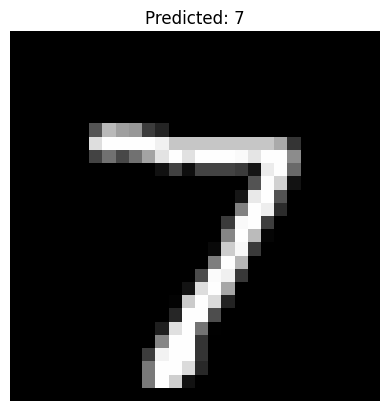

In [ ]:
predictions = model.predict(X_test)

plt.imshow(X_test[0].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}")
plt.axis('off')